# Python Plots for LGalaxies

## Import Libraries and Read Catalogs

<p>Use functions read_snap or read_tree to read catalogs. These are both defined in procedures.py. In case of read_snap, SnapshotList will be returned containing the list of snapshots read (usefull to later select galaxies in a given redshift).<p>

In [83]:
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
from importlib import reload
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import procedures
reload (procedures)
from procedures import *
import plots_input
reload (plots_input)
from plots_input import *

from LGalaxies_Henriques2015a_struct import LGalaxiesStruct
from LGalaxies_Henriques2015a_struct import PropertiesToRead


FirstFile = 40
LastFile = 79

Volume_MR = (BoxSize_MR**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles 
Volume_MRII = (BoxSize_MRII**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles 

(G_MR, SnapshotList) = read_snap(DirName_MR,FirstFile,LastFile,
                 PropertiesToRead,LGalaxiesStruct,RedshiftsToRead,RedshiftList)
    
#print (np.log10(gal['StellarMass'][1:5]*1.e10))
#help(gal)




Reading redshift:  0.0 

File  40  nGals =  [42242]
File  41  nGals =  [47629]
File  42  nGals =  [55873]
File  43  nGals =  [47850]
File  44  nGals =  [43320]
File  45  nGals =  [41247]
File  46  nGals =  [44146]
File  47  nGals =  [57110]
File  48  nGals =  [56639]
File  49  nGals =  [45285]
File  50  nGals =  [34468]
File  51  nGals =  [46302]
File  52  nGals =  [41603]
File  53  nGals =  [39554]
File  54  nGals =  [55507]
File  55  nGals =  [50603]
File  56  nGals =  [44605]
File  57  nGals =  [32137]
File  58  nGals =  [31869]
File  59  nGals =  [50583]
File  60  nGals =  [33396]
File  61  nGals =  [38307]
File  62  nGals =  [40973]
File  63  nGals =  [37032]
File  64  nGals =  [40355]
File  65  nGals =  [31114]
File  66  nGals =  [27376]
File  67  nGals =  [46951]
File  68  nGals =  [50467]
File  69  nGals =  [38058]
File  70  nGals =  [29864]
File  71  nGals =  [54276]
File  72  nGals =  [40796]
File  73  nGals =  [66824]
File  74  nGals =  [29530]
File  75  nGals =  [36862]
F

## Plots

In [126]:
plt.rcParams.update({'font.size': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18, 'axes.linewidth': 2, 
                     'xtick.major.size': 6, 'xtick.major.width': 1.5, 
                     'ytick.major.size': 6, 'ytick.major.width': 1.5, 
                     'xtick.minor.size': 3, 'xtick.minor.width': 1.,                   
                     'ytick.minor.size': 3, 'ytick.minor.width': 1.})

/scratch/jupyter/env/local/lib/python3.4/site-packages/ipykernel/__main__.py:71: RuntimeWarning: divide by zero encountered in log10


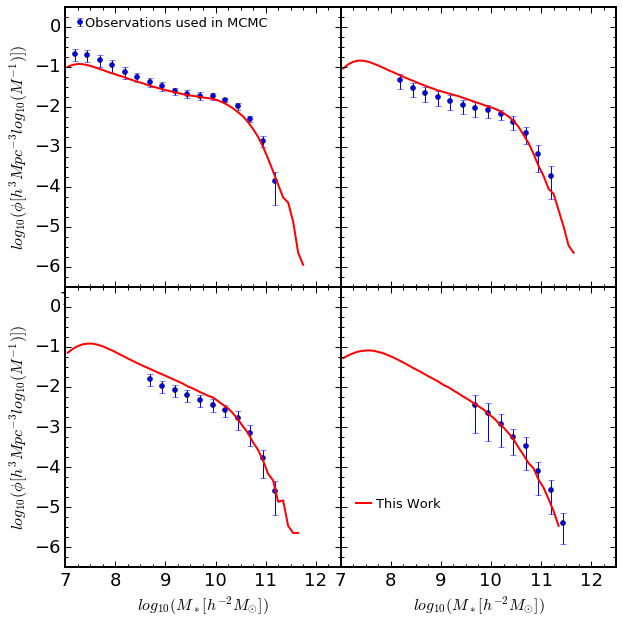

In [181]:
xmin=7.0
xmax=12.5
ymin=-6.5
ymax=0.5
bin=0.1


plt.rcParams.update({'xtick.major.width': 1.0, 'ytick.major.width': 1.0, 
                     'xtick.minor.width': 1.0, 'ytick.minor.width': 1.0})

fig = plt.figure(figsize=(9,9))
grid = gridspec.GridSpec(2, 2)
grid.update(wspace=0.0, hspace=0.0)

for ii in range(0,4):
    
    if ii == 0 :
        redshift=RedshiftList[ii]
    else :  #avoid using z=0.4
        redshift=RedshiftList[ii+1] 
    
    subplot=plt.subplot(grid[ii])

    subplot.set_ylim([ymin, ymax]), subplot.set_xlim([xmin, xmax])
    if ii==2 or ii == 3:
        xlab='$log_{10}(M_*[h^{-2}M_{\odot}])$'
    else:
        xlab=''
    if ii==0 or ii == 2:
        ylab='$log_{10}(\phi [h^3 Mpc^{-3} log_{10}(M^{-1})])$'
    else:
        ylab=''      
    subplot.set_xlabel(xlab, fontsize=16)
    subplot.set_ylabel(ylab, fontsize=16)
    
   
    majorFormatter = FormatStrFormatter('%d')
    subplot.xaxis.set_major_locator(MultipleLocator(1))    
    subplot.xaxis.set_minor_locator(MultipleLocator(0.25))      
    subplot.yaxis.set_minor_locator(MultipleLocator(0.25))
    
    if ii==1 or ii == 3:
        plt.tick_params(axis='y', which='both', left='on', labelleft='off')
           
    
    #OBSERVATIONS   
    char_redshift="%0.0f" % redshift       
    file = Datadir + '/ObsConstraints/StellarMassFunction_z'+char_redshift+'.00.txt'
    obs = Table.read(file, format='ascii')
    
    obs_xbin=obs['col1']+(obs['col2']-obs['col1'])/2.
    asy_yerror = [np.log10(obs['col3']/(obs['col3']-obs['col4'])), 
                  np.log10((obs['col3']+obs['col4'])/obs['col3'])]
    subplot.errorbar(obs_xbin, np.log10(obs['col3']),yerr=asy_yerror,
             fmt='o', markersize=5, ecolor='blue', color='blue')
    #sub = plt.subplot(111)
    
    
    #MODEL
    if ii == 0 :
        sel= (G_MR['SnapNum']==SnapshotList[ii])
    else :  #avoid using z=0.4    
        sel=(G_MR['SnapNum']==SnapshotList[ii+1])
    G0_MR=G_MR[sel]   
    G0_MR=G0_MR[G0_MR['StellarMass']>0.]
    StellarMass=(np.log10(G0_MR['StellarMass']*1.e10*Hubble_h) +
                 np.random.randn(len(G0_MR['StellarMass']))*0.08*(1+redshift))

    bin_arr=np.arange(7.0,12.0+bin,bin)
    hist=np.histogram(StellarMass, bins=bin_arr, range=(7.0,12.0))   
    subplot.plot(hist[1][0:len(hist[1][:])-1]+bin/2.,np.log10(hist[0][:]/(Volume_MR*bin)),
             color='red', linewidth=2)


    #LABELS
    if ii==0:
        subplot.text(7.4, 0.0, 'Observations used in MCMC', fontsize= 13)
        subplot.errorbar(7.3, 0.12, yerr=0.1, fmt='o', markersize=5, color='blue')
        
    if ii==3:
        subplot.text(7.7, -5.0, 'This Work', fontsize= 13)
        subplot.plot([7.3,7.6], [-4.9,-4.9], linestyle='-', linewidth=2, color='red')    
#endfor


plt.tight_layout()
plt.savefig('./fig/plots.pdf')
